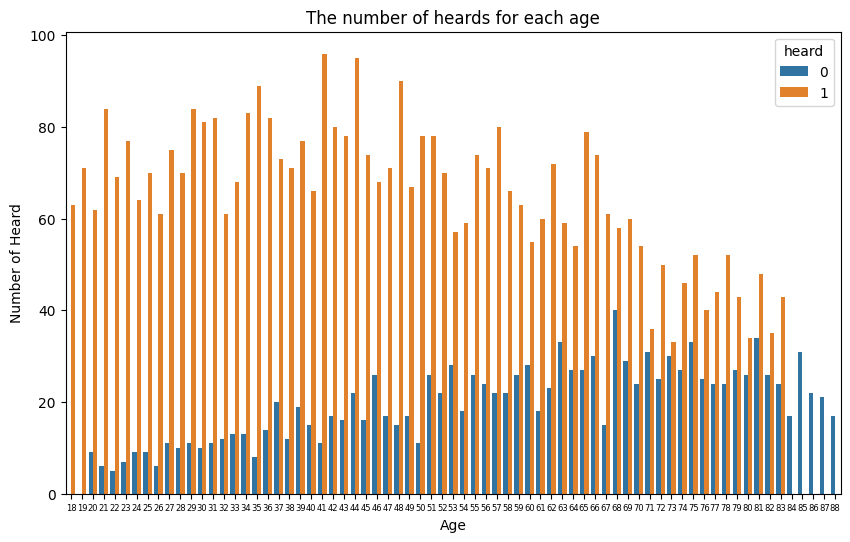

The Pearson correlation between 'age' and 'heard' is -0.2889082492219424
The Spearman correlation between 'age' and 'heard' is -0.2835979188896769


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data  = pd.read_csv('siren_data_train.csv')

grouped_data = data.groupby('age')['heard'].count().reset_index()

plt.figure(figsize=(10,6))
sns.countplot(x='age', hue='heard', data=data)

plt.title('The number of heards for each age')
plt.xlabel('Age')
plt.ylabel('Number of Heard')

plt.xticks(fontsize=6) 
plt.show()

correlation = data['age'].corr(data['heard'])
print(f"The Pearson correlation between 'age' and 'heard' is {correlation}")

spearman_correlation = data['age'].corr(data['heard'], method='spearman')
print(f"The Spearman correlation between 'age' and 'heard' is {spearman_correlation}")


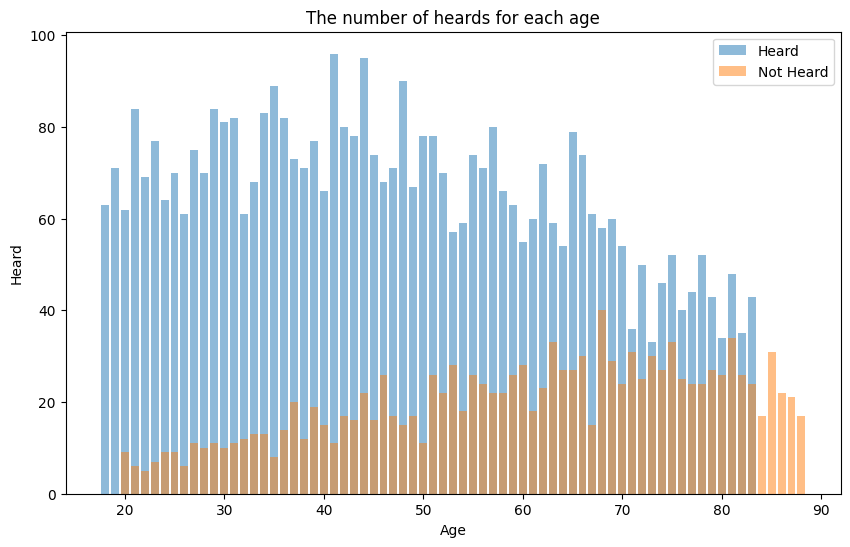

In [26]:
extracted_data = data[['age', 'heard']]
extracted_heards = extracted_data[extracted_data['heard'] == 1].groupby('age')['heard'].size().reset_index()
extracted_not_heards = extracted_data[extracted_data['heard'] == 0].groupby('age')['heard'].size().reset_index()

#plt.figure(figsize=(10,6))
#plt.scatter(x='age', y='heard', data=extracted_heards, label='Heard')
#plt.scatter(x='age', y='heard', data=extracted_not_heards, label='Not Heard')
#plt.legend()
#plt.xlabel('Age')
#plt.ylabel('Heard')
#plt.show()

plt.figure(figsize=(10,6))

# Plot the 'Heard' data
plt.bar(x='age', height='heard', data=extracted_heards, label='Heard', alpha=0.5)

# Plot the 'Not Heard' data
plt.bar(x='age', height='heard', data=extracted_not_heards, label='Not Heard', alpha=0.5)
plt.title('The number of heards for each age')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Heard')
plt.show()
